# 1. GPT 동작원리

1. 사용자 프롬프트 입력 (ex. 질문)
2. 텍스트 수치화 (ex. 임베딩) : 모델이 텍스트의 문맥을 파악할 수 있도록
3. 문맥 파악 후 다음에 나올 단어를 예측 (ex. 확률)
4. 사용자 전달

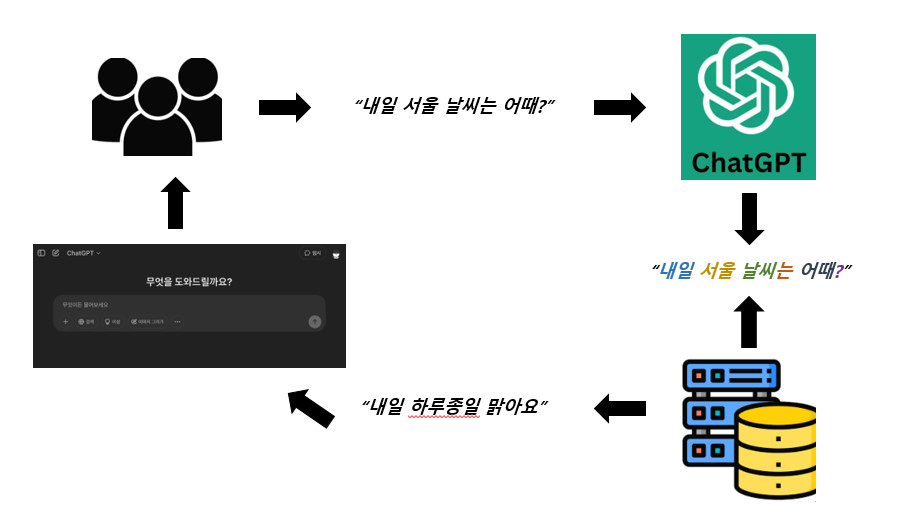

In [ ]:
import os
import requests
import streamlit as st
from dotenv import load_dotenv

import google.generativeai as genai
from google.generativeai import GenerationConfig

In [ ]:
load_dotenv()

In [ ]:
api_key = os.getenv("GEMINI_API_KEY") # GEMINI_API_KEY 키에 해당하는 value를 가져온다 (=api key)
print(api_key[:-5]) # 보안상의 이유로 끝의 5자리는 생략!

In [ ]:
# api key를 등록, 저장
# 이 코드를 실행함으로써 Gemini 모델 객체를 만들거나 generate_content()와 같은 api 호출 메소드를 반복해서 실행할 때 매번 key를 넘기지 않아도 된다. -> 일종의 프로젝트 key 전역설정
genai.configure(api_key=os.getenv("GEMINI_API_KEY"))

#### 모델 객체 생성
-  LLM 모델 종류
> gemini-2.0-flash

> gemini-2.5-flash

> gemini-2.5-pro : Google Ai Studio에서 무료 사용 가능

In [ ]:
model = genai.GenerativeModel('gemini-2.5-flash')

In [ ]:
model

## reponse : LLM 모델의 답변
- response.text → 최종 생성 텍스트
- response.candidates → 여러 후보 응답
- response.usage_metadata → 토큰 사용량 정보

etc...

In [ ]:
# 1. generate_content(text) 내의 문장(text)을 프롬프트로 LLM 모델에게 전달
# 2. generate_content() : Google Gemini API 서버에 요청
# 3. response : LLM 모델이 내놓은 답변 (여러 정보 확인 가능)
response = model.generate_content("안녕하세요, Gemini API 테스트 중입니다.")

In [ ]:
response.text